# Instalando Geopandas

In [1]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 37.4 MB/s 
     |████████████████████████████████| 16.7 MB 311 kB/s 


# Introducción básica Geopandas
obtenido de [Geopandas](https://geopandas.org/en/stable/getting_started/introduction.html)

creando y consultado un geopandas dataframe

In [2]:
import geopandas as gpd

path_to_data = gpd.datasets.get_path("nybb")
gdf = gpd.read_file(path_to_data)

gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [3]:
gdf = gdf.set_index("BoroName")

In [4]:
gdf["area"] = gdf.area
gdf["area"]

BoroName
Staten Island    1.623822e+09
Queens           3.045214e+09
Brooklyn         1.937478e+09
Manhattan        6.364712e+08
Bronx            1.186926e+09
Name: area, dtype: float64

In [5]:
gdf

,BoroCode,Shape_Leng,Shape_Area,geometry,area
BoroName,,,,,
Staten Island,5,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....",1.623822e+09
Queens,4,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",3.045214e+09
Brooklyn,3,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",1.937478e+09
Manhattan,1,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....",6.364712e+08
Bronx,2,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",1.186926e+09


creando columnas a partir de los atributos del objeto

In [6]:
gdf['boundary'] = gdf.boundary
gdf['boundary']

BoroName
Staten Island    MULTILINESTRING ((970217.022 145643.332, 97022...
Queens           MULTILINESTRING ((1029606.077 156073.814, 1029...
Brooklyn         MULTILINESTRING ((1021176.479 151374.797, 1021...
Manhattan        MULTILINESTRING ((981219.056 188655.316, 98094...
Bronx            MULTILINESTRING ((1012821.806 229228.265, 1012...
Name: boundary, dtype: geometry

In [7]:
gdf['centroid'] = gdf.centroid
gdf['centroid']

BoroName
Staten Island     POINT (941639.450 150931.991)
Queens           POINT (1034578.078 197116.604)
Brooklyn          POINT (998769.115 174169.761)
Manhattan         POINT (993336.965 222451.437)
Bronx            POINT (1021174.790 249937.980)
Name: centroid, dtype: geometry

In [8]:
first_point = gdf['centroid'].iloc[0]
gdf['distance'] = gdf['centroid'].distance(first_point)
gdf['distance']

BoroName
Staten Island         0.000000
Queens           103781.535276
Brooklyn          61674.893421
Manhattan         88247.742789
Bronx            126996.283623
Name: distance, dtype: float64

haciendo uso de las funciones de los dataframes de pandas en geopadas

In [9]:
gdf['distance'].mean()

76140.09102166798

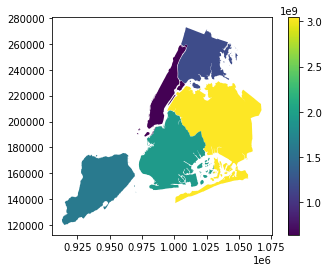

In [10]:
gdf.plot("area", legend=True)

## Map Classify 
para visualizaciones interactivas, es necesario instalar mapclassify

In [11]:
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
gdf.explore("area", legend=False)

Output hidden; open in https://colab.research.google.com to view.

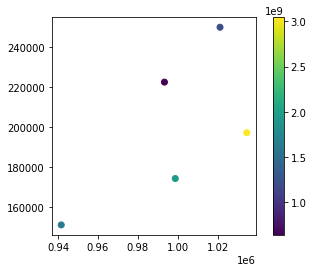

In [13]:
gdf = gdf.set_geometry("centroid")
gdf.plot("area", legend=True)

In [14]:
gdf

,BoroCode,Shape_Leng,Shape_Area,geometry,area,boundary,centroid,distance
BoroName,,,,,,,,
Staten Island,5,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....",1.623822e+09,"MULTILINESTRING ((970217.022 145643.332, 97022...",POINT (941639.450 150931.991),0.000000
Queens,4,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",3.045214e+09,"MULTILINESTRING ((1029606.077 156073.814, 1029...",POINT (1034578.078 197116.604),103781.535276
Brooklyn,3,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",1.937478e+09,"MULTILINESTRING ((1021176.479 151374.797, 1021...",POINT (998769.115 174169.761),61674.893421
Manhattan,1,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....",6.364712e+08,"MULTILINESTRING ((981219.056 188655.316, 98094...",POINT (993336.965 222451.437),88247.742789
Bronx,2,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",1.186926e+09,"MULTILINESTRING ((1012821.806 229228.265, 1012...",POINT (1021174.790 249937.980),126996.283623


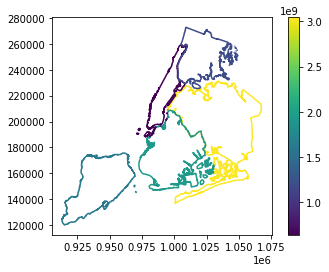

In [15]:
gdf = gdf.set_geometry("boundary")
gdf.plot("area", legend=True)

In [16]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 5 entries, Staten Island to Bronx
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   BoroCode    5 non-null      int64   
 1   Shape_Leng  5 non-null      float64 
 2   Shape_Area  5 non-null      float64 
 3   geometry    5 non-null      geometry
 4   area        5 non-null      float64 
 5   boundary    5 non-null      geometry
 6   centroid    5 non-null      geometry
 7   distance    5 non-null      float64 
dtypes: float64(4), geometry(3), int64(1)
memory usage: 532.0+ bytes


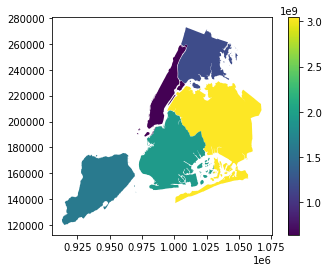

In [17]:
gdf = gdf.set_geometry("geometry")
gdf.plot("area", legend=True)

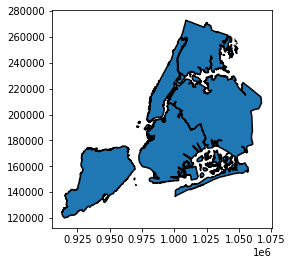

In [18]:
ax = gdf["geometry"].plot()
gdf["boundary"].plot(ax=ax, color="black")

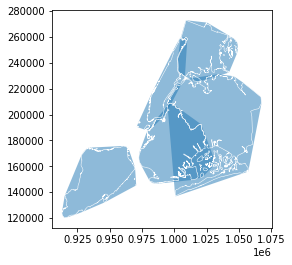

In [19]:
gdf["convex_hull"] = gdf.convex_hull
ax = gdf["convex_hull"].plot(alpha=.5)  # saving the first plot as an axis and setting alpha (transparency) to 0.5
gdf["boundary"].plot(ax=ax, color="white", linewidth=.5)  # passing the first plot and setting linewitdth to 0.5

In [20]:
# buffering the active geometry by 10 000 feet (geometry is already in feet)
gdf["buffered"] = gdf.buffer(10000)

# buffering the centroid geometry by 10 000 feet (geometry is already in feet)
gdf["buffered_centroid"] = gdf["centroid"].buffer(10000)

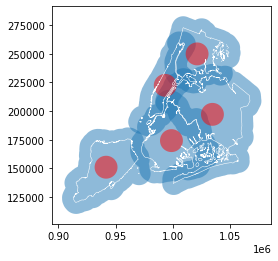

In [21]:
ax = gdf["buffered"].plot(alpha=.5)  # saving the first plot as an axis and setting alpha (transparency) to 0.5
gdf["buffered_centroid"].plot(ax=ax, color="red", alpha=.5)  # passing the first plot as an axis to the second
gdf["boundary"].plot(ax=ax, color="white", linewidth=.5)  # passing the first plot and setting linewitdth to 0.5